# Problem Set 2 (93 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

## Submatrices (bonus).


Let $U$ be an $n \times r$ orthogonal matrix, $n \geq r$. It is well known, that such matrix has $r \times r$ non-singular submatrix $\hat{U}$. To measure ``non-singularity'' of this submatrix one can use the minimal singular value, or the norm of the inverse $\Vert \hat{U}^{-1} \Vert.$

Suppose we select the submatrix that has the smallest possible norm of the inverse among all $r \times r$ submatrices of $U$. What is the maximal value of such norm? Mathematically, we need to estimate

$$t(n, r) = \max_U \min_{\hat{U}} \Vert \hat{U}^{-1} \Vert_2.$$

Is it true that $t(n, r) \leq \sqrt{n}$?




# Problem 1 (QR algorithm) (22 pts)

One of the way to find eigenvalues for real matrix $A$ of size $(n,n)$ is **QR algorithm**. Each iteration of the algorithm consists of two main steps:

1. Compute QR decompostion $A_k = Q_kR_k$
2. Compute new matrix $A_{k+1} = R_kQ_k$

$A_0 = A$

From lecture materials you have seen that algorithm complexity in general is $O(Nn^3)$ ($N$ - number of iterations). But we can make an improvement by transforming matrix to **Upper Hessenberg form** ([link](https://en.wikipedia.org/wiki/Hessenberg_matrix)) before running the algorithm. 

The good property of Hessenberg matrix is preservation of its structure during QR algorithm iteration. In other words, if $A_{k}$ is Hessenberg matrix, then $A_{k+1}$ will also be a Hessenberg matrix. We can use this property to reduce complexity of each iteration. Since we need only to zero first lower subdiagonal for QR factorization (first step in each iteration) we can use **Givens rotations** $O(n^2)$ instead of **Householder reflections** $O(n^3)$. Now, the last question is how to obtain Hessenberg matrix - use Householder reflections. Since it is done only once (initialization stage), complexity of algorithm will not be increased.

Final algorithm:

I. **Initialization**

> - Transform original matrix $A$ to Hessenberg form $H_0 = U^TAU$ using Householder reflections.

II. **Loop**

> **for** k in range(**N**):
> -  Compute QR using Givens rotation: such matrices $Q_k,R_k$ that $H_k = Q_kR_k$

> - Update matrix $H_{k+1} = R_k Q_k$



## What do you need to do:
### Theoretical part
<!-- 1. For real square metrices $Q,A,\hat{A}$ prove that if we have relation $A = Q^T\hat{A}Q$ ($Q$ - orthogonal matrix) then eigenvalues of $A$ and $\hat{A}$ are equal. **(3 pts)**
2. Suppose we factorize real square matrix $A = Q^TTQ$, where $Q$ is orthogonal and $T$ is upper/lower triangular matrix. Describe the easiest way to find eigenvalues of $A$. **(2 pts)** -->
1. Show that Hessenberg matrix preserves its structure under QR algorithm: if $A_k$ hessenberg matrix then $A_{k+1}$ hessenberg as well. **(5 pts)**

2. **(Bonus task)** For real square matrix $A$, which all leading minors are nondegenerate, prove that QR algorithm converges to upper triangular matrix: $\lim\limits_{k\rightarrow \infty} A_k = T$, where $T$ - upper triangular matrix.

### Practical part

1. Implement function **Hessenberg_Transform** which takes a real square matrix $A$ and returns transformed matrix in Hessenberg form $H$ (use householder reflections). **(5 pts)**

2. Implement function **QR_givens** which takes a real square matrix in Hessenberg form $H$ and returns QR factorization: matrices $Q$ and $R$. **(5 pts)**

3. Implement function **QR_algorithm**, which takes a real square matrix $A$ and returns $H_{N}$ - the result of $N$ iterations of QR algorithm. Use previously implemented **Hessenberg_Transform** to get Hessenberg form of matrix $A$, and  **QR_givens** to make QR factorization on each iteration. **(2 pts)**

4. Varing parameter $n$ generate random matrix of size $(n,n)$ and measure the computation time of **QR_algorithm** function. Plot observed data: computation time versus $n$. Use logarithmic scale for both axes. Explain obtained results.**(3 pts)**

5. Compare eigenvalues computed using your implemented algorithm and standard numpy functionality for some random matrix. Try different number of iterations for the algorithm. Explain results. **(2 pts)**

### Theoretical proofs

1. Recall Givens rotation matrix:

$$ G(i,j,\theta) = 
\begin{pmatrix}
1      & \cdots & 0      & \cdots & 0        &\cdots & 0\\
\vdots & \ddots & \vdots &        & \vdots   &       &\vdots  \\
0      & \cdots & c_{ii}     & \cdots &  -s_{ij} &\cdots & 0\\ 
\vdots &        & \vdots & \ddots & \vdots   &       &\vdots  \\
0      & \cdots & s_{ji}      & \cdots &  c_{jj} &\cdots & 0\\
\vdots &        & \vdots &      & \vdots   & \ddots   &\vdots  \\
0      & \cdots & 0      & \cdots & 0        &\cdots & 1\\
\end{pmatrix}
$$

where $ c_{ii} = c_{jj} = \cos{\theta}, s_{ij} = -s_{ji} = \sin{\theta}$

if $x \in \mathbb{R}^n$ and $y = G(i,j,\theta)^*x$, then:

$$ y_k = \begin{cases} cx_i - sx_j, & \mbox{if } k=i \\ sx_i+cx_j, & \mbox{if } k = j \\
x_k,&\mbox{if } k\neq i,j \end{cases}$$

We can force $y_j$ to be zero by setting:

$$ c = \frac{x_i}{\sqrt{x_i^2+x_j^2}}, s = \frac{-x_j}{\sqrt{x_i^2+x_j^2}}$$

Applying to Hessenberg matrix H:

$$
\begin{pmatrix}
\times & \times & \times & \times \\
\times & \times & \times & \times \\
0 & \times & \times & \times \\
0 & 0 & \times & \times \\
\end{pmatrix} 
\xrightarrow{G(1,2,\theta_1)^*}
\begin{pmatrix}
\times & \times & \times & \times \\
0 & \times & \times & \times \\
0 & \times & \times & \times \\
0 & 0 & \times & \times \\
\end{pmatrix} 
\xrightarrow{G(2,3,\theta_2)^*}
\begin{pmatrix}
\times & \times & \times & \times \\
0 & \times & \times & \times \\
0 & 0 & \times & \times \\
0 & 0 & \times & \times \\
\end{pmatrix} 
\xrightarrow{G(3,4,\theta_3)^*}
\begin{pmatrix}
\times & \times & \times & \times \\
0 & \times & \times & \times \\
0 & 0 & \times & \times \\
0 & 0 & 0 & \times \\
\end{pmatrix} 
= R
$$

So, with $G_k = G(k,k+1,\theta_k)$, we get

$$
G_3^*G_2^*G_1^*H=R, G_3^*G_2^*G_1^* = Q^* \Leftrightarrow H=QR
$$

Multiplying $Q$ and $R$ in reversed order gives:

$$
\bar H = RQ = RG_1G_2G_3
$$

or

$$
R = \begin{pmatrix}
\times & \times & \times & \times \\
0 & \times & \times & \times \\
0 & 0 & \times & \times \\
0 & 0 & 0 & \times \\
\end{pmatrix}
\xrightarrow{G(1,2,\theta_1)}
\begin{pmatrix}
\times & \times & \times & \times \\
\times & \times & \times & \times \\
0 & 0 & \times & \times \\
0 & 0 & 0 & \times \\
\end{pmatrix}
\xrightarrow{G(2,3,\theta_2)}
\begin{pmatrix}
\times & \times & \times & \times \\
\times & \times & \times & \times \\
0 & \times & \times & \times \\
0 & 0 & 0 & \times \\
\end{pmatrix}
\xrightarrow{G(3,4,\theta_3)}
\begin{pmatrix}
\times & \times & \times & \times \\
\times & \times & \times & \times \\
0 & \times & \times & \times \\
0 & 0 & \times & \times \\
\end{pmatrix} = \bar H
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def Householder(x):
    x = np.transpose([x])
    size = np.shape(x)[0]
    e = np.zeros_like(x)
    e[0] = 1
    a = np.linalg.norm(x,2)
    
    v1 = (x-a*e)/(np.sqrt(2*(a**2-a*x[0])))
    v2 = (x+a*e)/(-np.sqrt(2*(a**2+a*x[0])))
    
    if np.linalg.norm(v1,2) > np.linalg.norm(v2,2):
        v = v1
    else:
        v = v2
    
    H = np.identity(size) - 2*(np.dot(v,np.transpose(v)))
    return H

def Hessenberg_Transform(A, func = Householder):
    n = np.shape(A)
    for i in range(1,n[0]-1):
        x = A[i:,i-1]
        H = func(x)
        J = np.block([[np.identity(i),np.zeros((i,n[0]-i))],[np.zeros((n[0]-i,i)),H]])
        A = np.dot(np.dot(J,A),J)
    return A

In [115]:

def QR_givens(H):
    n = np.shape(H)
    Q = np.identity(n[0])
    
    for i in range(n[0]-1):
        G = np.identity(n[0])
        c = H[i,i]/(np.sqrt(H[i,i]**2+H[i+1,i]**2))
        s = -H[i+1,i]/(np.sqrt(H[i,i]**2+H[i+1,i]**2))
        G[i,i] = c 
        G[i+1,i+1] = c
        G[i,i+1] = -s
        G[i+1,i] = s
        H = np.dot(G,H)
        Q = np.dot(G,Q)
    return np.linalg.inv(Q),H

In [116]:

def QR_algorithm(A, N_iterations,func1 = Hessenberg_Transform, func2 = QR_givens):
    
    H = func1(A)

    for i in range(N_iterations):
        Q, R = func2(H)
        H = np.dot(R,Q)

    return H

In [15]:
np.random.seed(25)
n = np.logspace(1,2.5,12)
time = list()
for i in n:
    x = int(i)
    A = np.random.random((x,x))
    a = %timeit -o QR_algorithm(A,100)
    time.append(a.best)

39 ms ± 6.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
46 ms ± 5.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
64.6 ms ± 655 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
105 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
205 ms ± 6.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
334 ms ± 20 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.77 s ± 33.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.03 s ± 31.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.81 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.7 s ± 376 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
34.2 s ± 1.57 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 53s ± 2.15 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


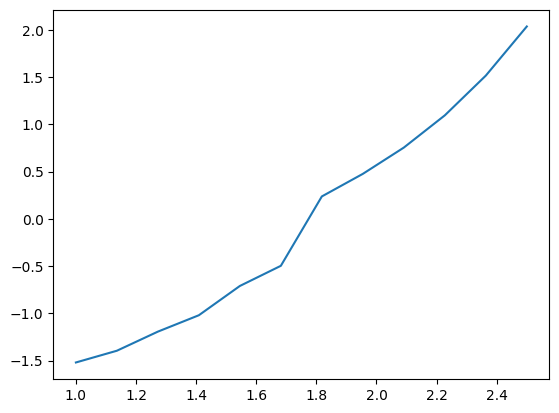

In [16]:
plt.plot(np.log10(n),np.log10(time))

In [270]:
a = np.random.random((50, 50))
A = np.tril(a) + np.tril(a, -1).T
N_iter = np.arange(10,120,20)
eig_qr = list()
for n in N_iter:
    eig_qr.append(np.sort(np.diag(QR_algorithm(A,n))))
eig_np = np.sort(np.linalg.eigvals(A))


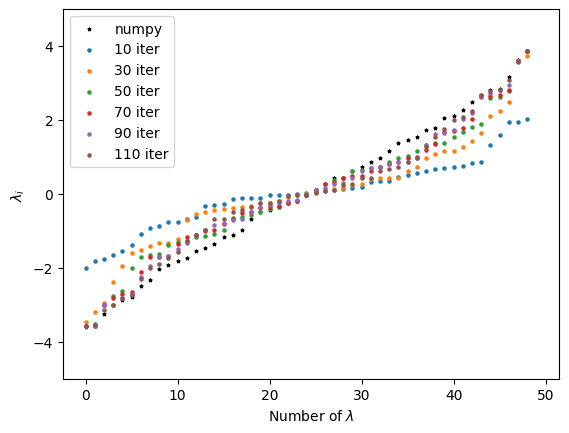

In [271]:
plt.scatter(range(len(eig_np)),eig_np,s= 5, label='numpy', c = 'black', marker = '*')
for ind,n in enumerate(N_iter):
    plt.scatter(range(len(eig_np)), eig_qr[ind], s= 5, label = f'{n} iter')
plt.legend()
plt.xlabel("Number of $\lambda$")
plt.ylabel('$\lambda_i$')
plt.ylim(-5,5);

# Problem 2 (Stochastic trace estimation) (30 pts) 

In this problem we consider stochastic estimation of trace for implicitly-defined matrices.

Impicitly-defined matrices are such that matrix-vector multiplication is easy to perform, but matrix entries are not easy to obtain (examples are given by integral kernels, products of sparse matrices, products of a set of circulants, low-rank matrices given in a compressed form, etc).

In such cases it is often possible to approximate trace with $k\ll N$ matrix-vector products, where $N$ is the size of matrix.

One popular way to obtain stochastic estimate is Hutchinson algorithm.

## Hutchinson algorithm
Let $u$ be a random vector from $\mathbb{R}^{n}$ with independent identicaly distributed entries $u_i$ each having zero mean and variance $\sigma^2$.

Let $B$ be a symmetric matrix from $\mathbb{R}^{n\times n}$.

Hutchinson algorithm is roughly as follows:

    trace_estimate = 0
    for i=1:N do
        u = random_vector
        trace_estimate += (u,Bu)
    end do
    trace_estimate /= N

So Hutchinson algorithm uses empirical mean $u^\top B u$ as a trace estimation. Below we ask you to find properties of this estimator.

**Subproblem 1 (5 pts)**

1. Show that $\mathbb{E}\left[u^\top B u\right] = \sigma^2 \text{tr} B$, where $\mathbb{E}\left[\cdot\right]$ denotes average wrt $u$.

$$
\mathbb{E}[u^\top Bu] = \sum_{i=1}^n\sum_{j=1}^n b_{ij}\mathbb{E}[u_iu_j]=\sum_{i=1}^n b_{ii}\mathbb{E}[u_i^2]+\sum_{u,j=1, j\neq i}^n b_{ij} \mathbb{E}[u_i]\mathbb{E}[u_j] = (\sigma^2 + \mu^2)\sum_{i=1}^n b_{ii} + \mu^2 \sum_{u,j=1, j\neq i}^n b_{ij} = (\sigma^2 + \mu^2)trace(B) + \mu^2\sum_{u,j=1, j\neq i}^nb_{ij}
$$

if $\mu = 0$ then $\mathbb{E}\left[u^\top B u\right] = \sigma^2 \text{tr} B$ 

2. Show that $\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}B_{ii}^2$, where $\text{var}$ denotes [variance](https://en.wikipedia.org/wiki/Variance).

$$\text{var}[X] = \mathbb{E}[X^2]-\mathbb{E}[X]^2
$$

$$
\mathbb{E}[u^\top Bu u^\top Bu] = \mathbb{E}\left[\left(\sum_{i,j}b_{ij}u_iu_j\right)\left(\sum_{k,l}b_{kl}u_ku_l\right)\right] = \sum_{i,j,k,l}b_{ij}b_{kl}\mathbb{E}[u_iu_ju_ku_l] = \sum_ib^2_{ii}\mathbb{E}[u_i^4] + \mathbb{E}[u_i^2]\mathbb{E}[u_j^2]\sum_{i,j,i\neq j}(b_{ii}
b_{jj} + b_{ij}^2+b_{ij}b_{ji}) =\sum_i b_{ii}^2\mathbb{E}[u_i^4] + (\sigma^2 + \mu^2)^2\sum_{i,j, i\neq j}(b_{ii}b_{jj} + b_{ij}^2 + b_{ij}b_{ji}) =\sum_i b_{ii}^2\mathbb{E}[u_i^4] + \sigma^4\sum_{i,j, i\neq j}(b_{ii}b_{jj} + b_{ij}^2 + b_{ij}b_{ji}) 
$$

$$
\mathbb{E}[u^\top Bu]^2 = (\sigma^2trB)^2 = \sigma^4 \sum_{i,j} b_{ii}b_{jj} =\sigma^4 (\sum_i b_{ii}^2 + \sum_{i,j, i \neq j}b_{ii}b_{jj})
$$

$$
\text{var}[u^\top Bu] = \sum_i b_{ii}^2\mathbb{E}[u_i^4] + \sigma^4\sum_{i,j, i\neq j}(b_{ii}b_{jj} + b_{ij}^2 + b_{ij}b_{ji}) - \sigma^4 (\sum_i b_{ii}^2 + \sum_{i,j, i \neq j}b_{ii}b_{jj}) = \sigma^4\sum_{i,j, i\neq j}(b_{ij}^2 + b_{ij}b_{ji}) + (\mathbb{E}[u_i^4] - \sigma^4)\sum_i b_{ii}^2
$$

since $B$ is symmetric, $b_{ij} = b_{ji}$, then

$$
\text{var}[u^\top Bu] = 2\sigma^4\sum_{i,j, i\neq j}b_{ij}^2 + (\mathbb{E}[u_i^4] - \sigma^4)\sum_i b_{ii}^2
$$

3. Find the variance for the case when:

  a. each $u_{i}\sim \mathcal{N}(0, \sigma^2)$, i.e., for normally distributed with zero mean and variance $\sigma^2$;
  
$$
\mathbb{E}[x^4] = \int_{-\infty}^{\infty} x^4f(x)dx = \frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{\infty} x^4e^{-\frac{x^2}{2\sigma^2}}dx = \frac{3\sigma^2}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{\infty} x^2e^{-\frac{x^2}{2\sigma^2}}dx = 3\sigma^4
$$

then

$$
\text{var}[u^\top Bu] = 2\sigma^4\sum_{i,j, i\neq j}b_{ij}^2 +2\sigma^4\sum_i b_{ii}^2 = 2\sigma^4 ||B||_F^2 
$$
  b. each $u_{i}$ follows [Rademacher distribution](https://en.wikipedia.org/wiki/Rademacher_distribution);
  
  $$
  \mathbb{E}[u_i^4] = (-1)^4 \frac{1}{2} + 1^4\frac{1}{2} = 1
  $$
  
  $$
  \sigma = 1
  $$
  
  $$
  \text{var}[u^\top Bu] = 2\sum_{i,j, i\neq j}b_{ij}^2 +2(1-1)\sum_i b_{ii}^2 = 2(||B||_F^2 - \sum_i b_{ii}^2)
  $$

4. Why variance matters.
  
  Let $z_1, \dots, z_N$ are independent identicaly distributed samples of random variable with mean $\mu$ and variance $\sigma^2$ and $\hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} z_{i}$ is a standard Monte Carlo extimator for mean.

  a. Show that $\mathbb{E}\left[\hat{\mu}\right] = \mu$ and $\text{var}\left[\hat{\mu}\right] = \sigma^2 \big/ N$.
  
  $$
   \mathbb{E}\left[\hat{\mu}\right] =  \mathbb{E}\left[\frac{1}{N}\sum_{i=1}^{N} z_{i}\right] =  \frac{1}{N}\mathbb{E}\left[\sum_{i=1}^{N} z_{i}\right] = \frac{1}{N}\sum_{i=1}^{N}\mathbb{E}\left[ z_{i}\right] =\frac{1}{N}N\mu = \mu
  $$

  $$
  \text{var}\left[\hat{\mu}\right] =\text{var}\left[\frac{1}{N}\sum_{i=1}^{N} z_{i}\right] =\frac{1}{N^2} \text{var}\left[\sum_{i=1}^{N} z_{i}\right] = \frac{1}{N^2}\sum_{i=1}^{N} \text{var}\left[z_{i}\right] = N\sigma^2 \big/ N = \frac{\sigma^2}{N}
  $$
  
  b. Use [Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality) to find the number of samples $N$ you need to use to guarante that estimate $\hat{\mu}$ deviates from $\mu$ on $\epsilon\ll 1$ with probability at most $\delta\ll 1$.
  
  $$
  \text{P}(|X-\mu| \geq k) \leq \frac{\text{var}(X)}{k^2}
  $$
  
  for $ \hat\mu = \frac{1}{N}\sum_{i=1}^{N}z_{i}$ :
  
    $$
  \text{P}(|\hat\mu-\mu| \geq \epsilon) \leq \frac{\text{var}(z_i)}{N\epsilon^2} \leq \delta
  $$
  
$$
N \geq \frac{\sigma^2}{\epsilon^2\delta}
$$




5. Does the variance of the estimator matters?

  a. Adapt bounds from _Subproblem 1 point 4.b_ for Hutchinson algorithm with normal and Rademacher distributions.
  
  $$
  \hat\mu = \text{tr}^N_D(B) = \frac{1}{N}\sum_{i=1}^Nu_i^\top Bu_i
  $$
  
  $$ 
  \text{var}(\text{tr}^N_D(B)) = \begin{cases} 2\sigma^4 ||B||_F^2 , & u_{i}\sim \mathcal{N}(0, \sigma^2) \\ 2(||B||_F^2 - \sum_i b_{ii}^2) ,&u_{i}\sim \text{Rademacher} \end{cases}
  $$
  
  then:
  $$ N \geq \begin{cases} \frac{2\sigma^4 ||B||_F^2 }{\epsilon^2\delta}, & u_{i}\sim \mathcal{N}(0, \sigma^2) \\ \frac{2(||B||_F^2 - \sum_i b_{ii}^2)}{\epsilon^2\delta} ,&u_{i}\sim \text{Rademacher} \end{cases}$$  

  b. Empirically evaluate variances from _Subproblem 1 point 2_ using several sparse, low-rank and circulant matrices.

  c. Comment on practicality of Chebyshev bounds. What is the number of iterations you need to perform to achieve reasonably small error with reasonably large probability according to this bound?

In [11]:
eps = 1 # mean of mu_i
delta = 0.95
N = rad_var(A)/(eps**2*delta)
print('number of iterations with propability 0.95 and error = mean(mu):', int(N))
print('convergence is O(1/eps^2)')

number of iterations with propability 0.95 and error = mean(mu): 12
convergence is O(1/eps^2)


In [2]:
import scipy.sparse as sps
import scipy as sp

A = sps.random(100,100).toarray() #sparce

C = np.random.random((100,100))

r = int(np.linalg.matrix_rank(C)/2)
u,s,v = np.linalg.svd(C)
u1 = u[:, :r]
s1 = s[:r]
v1 = v[:r, :]
C_r = u1.dot(np.diag(s1).dot(v1)) #low-rank

B = sp.linalg.circulant(np.random.random(100)) #circulant


In [3]:
def norm_var(A, sigma = 1):
    return 2*(sigma**4)*np.linalg.norm(A, ord = 'fro')**2

def rad_var(A):
    return 2*(np.linalg.norm(A, ord = 'fro')-np.sum(np.diag(A)**2))

In [23]:
print("sparce matrix")
print('norm_var:', norm_var(A), '\nrademacher_var', rad_var(A), '\n')
print("low-rank matrix")
print('norm_var:', norm_var(C_r), '\nrademacher_var', rad_var(C_r), '\n')
print("circulnt matrix")
print('norm_var:', norm_var(B), '\nrademacher_var', rad_var(B), '\n')

sparce matrix
norm_var: 67.0069777185169 
rademacher_var 11.351133820102698 

low-rank matrix
norm_var: 6469.109728100019 
rademacher_var 50.39543575332133 

circulnt matrix
norm_var: 6340.6501975818355 
rademacher_var 91.33314830580719 



**Subproblem 2 (5 pts)**


  1. Implement Hutchinson algorithm for normal and Rademacher distributions.

In [4]:
def hutch_normal(A,N_iter,sigma = 1):
    
    trace_estimate = 0
    n = np.shape(A)[0]
    
    for i in range(N_iter):
        u = np.random.normal(scale = sigma, size = n)
        trace_estimate += np.dot(np.transpose(u),np.dot(A,u))
    
    return trace_estimate/N_iter

In [5]:
def radem(size):
    rvs = np.array([])
    for i in range(size):
        if np.random.rand() <= 0.5:
            a=1
            rvs = np.append(rvs,a)
        else:
            a=-1
            rvs = np.append(rvs,a)
    return rvs

def hutch_rad(A,N_iter,func=radem):
    
    trace_estimate = 0
    n = np.shape(A)[0]

    for i in range(N_iter):
        u = func(n)
        trace_estimate += np.dot(np.transpose(u),np.dot(A,u))
    
    return trace_estimate/N_iter

2. Evaluate your algorithm on several matrices on your choice.

In [102]:
A1 = np.random.random((50,50))
A2 = np.arange(2500).reshape((50,50))

tr1 = np.trace(A1)
tr1n = hutch_normal(A1,100)
tr1r = hutch_rad(A1,100)

tr2 = np.trace(A2)
tr2n = hutch_normal(A2,100)
tr2r = hutch_rad(A2,100)

print('true:',tr1, '\nnormal for A1:', tr1n, '\nrademacher for A1:', tr1r, '\n')
print('true:',tr2, '\nnormal for A2:', tr2n, '\nrademacher for A2:', tr2r, '\n')

true: 21.09835704064997 
normal for A1: 27.776747107970742 
rademacher for A1: 27.12116124923758 

true: 62475 
normal for A2: 47860.703826695084 
rademacher for A2: 62405.64 



**Subproblem 3 (5 pts)**

Is it possible to obtain better bound? Here we study how to do that for simplified case.

Let $A$ be the $N\times N$ matrix with all entries equal one, i.e., $A_{ij}=1$. We consider variant of Hutchinson algorithm with standard normal variables, i.e., $u_{i} \sim \mathcal{N}(0, 1)$.


1. Show that $u^\top A u \big/ N$ has [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution).

let $p$ is rank($A$)

$$
\frac{1}{N}u^\top Au =  \frac{1}{N}\left(u^\top S \Lambda S^\top u\right) = \frac{1}{N}\left((S^\top u)^\top \Lambda (S^\top u)\right) =\frac{1}{N} \sum_{i=1}^p \lambda_i(s_i u)^2
$$
where $s_i$ are eigenvectors

Define random variables $x_i = s_iu$

Since matrix $A$ is all of ones $p=\text{rank}(A) = 1$ and it has only one nonzero eigenvalue, which is in fact equals to $N$

Therefore

$$
\frac{1}{N}u^\top Au = \frac{1}{N} \sum_{i=1}^p \lambda_i(s_i u)^2 = \frac{1}{N}Nx^2 = x^2 \sim  \chi^2_1
$$

2. Suppose that Hutchinson algorithm is applied for $M$ iteration. Show that $\sum_{i=1}^{M}u_i^\top A u_i \big/ N$ has $\chi^2(M)$ distribution (chi-squared distribution with $M$ degrees of freedom).

$$
\sum_{i=1}^{M}u_i^\top A u_i \big/ N = \frac{1}{N}\sum_{i=1}^{M}\sum_{j=1}^{p}\lambda_{ij}(s_{ij} u_i)^2 = \frac{1}{N}\sum_{i=1}^{M}Nx_i^2
$$

Since $\left\{u_i \right\}_{i=1}^M$ are i.i.d., then $x_i = (s_{ij}u_i)^2$ are i.i.d.
As a result:

$$
\sum_{i=1}^{M}u_i^\top A u_i \big/ N =\frac{1}{N}\sum_{i=1}^{M}Nx_i^2 = \sum_{i=1}^{M}x_i^2 \sim \chi^2(M)
$$


3. Let $M\geq50$, $G_{M} = \sum_{i=1}^{M}u_i^\top A u_i \big/ M$ and suppose that $\chi^2(M)$ has approximately normal distribution. Under this assumptions show that there exists small $\delta$ such that $\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) \geq 1 - \delta $.

Recall Chebyshev inequality:

$$
\text{Pr}(|G-\mu|\geq k\sigma)\leq\frac{1}{k^2}
$$

Since $G_M$ has variance $\frac{\sigma^2}{M}$ by chosing $k = \frac{|\mu|\epsilon\sqrt{M}}{\sigma}$ ineqaulity yields

$$
\text{Pr}(|G_M-\mu|\leq\epsilon|\mu|)\geq 1-\frac{\sigma^2}{\mu^2\epsilon^2M}
$$

where 

$$
\mu = \text{tr}(A) = n
$$

$$
\sigma = 1
$$

As a result 

$$
\text{Pr}(|G_M-n|\leq\epsilon n)\geq 1-\frac{1}{n^2\epsilon^2M} = 1 - \delta
$$

It is possible to generalize bound from Subproblem 3 point 3 and the result can be found in the paper by Avron and Toledo (2010).

---

Another similar bound that we state without a proof involves Frobenius norm.

For Hutchinson estimate with $l$ steps denoted $T_l$, $\delta \in (0, 1/2]$ for fixed constants $c$ and $C$

\begin{equation}
  \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|A\right\|_{F}\right) \geq 1 - \delta.
\end{equation}

## Improved Hutchinson algorithms

There are a lot of improved version of Hutchinson algorithms.

One fruitful idea is to represent the matrix $A$ as a sum $A = A_1 + A_2$ in such a way that $A_1$ has easy-to-compute trace and $\left\|A_2\right\|_F^2 \ll \left\|A_1\right\|_F^2$ or $\text{tr}(A_2) \ll \text{tr}(A_1)$ if both $A_1$ and $A_2$ are spd matrices.

If this splitting is possible to construct, one has smaller one-sample variance or better $(\epsilon, \delta)$-estimator.

Below we ask you to prove simple theoretical result on the systematic construction of such splittings.

**Subproblem 4 (5 pts)**

Let $A\in\mathbb{R}^{N\times N}$ be symmetric positive definite matrix and $Q\in\mathbb{R}^{N\times k}$ contains $k$ eigenvalues corresponding to top $k$ eigenvalues, i.e., $\lambda_1 \leq \lambda_2\leq\dots\leq \lambda_k\leq\lambda_{k+1}\leq \dots \leq \lambda_{N}$ eigenvalues are ordered and $Q_{\star 1}, \dots Q_{\star k}$ are eigenvectors with eigenvalues $\lambda_{N-k},\dots,\lambda_{N}$.

1. Show that $\text{tr}\left(A\right) = \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right)$.


$$
\text{tr}\left(A Q Q^T\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right) = \text{tr}\left(A Q Q^T\right) + \text{tr}\left((A - QQ^TA )(I - QQ^T)\right)= \text{tr}\left(A Q Q^T\right) + \text{tr}\left((A - AQQ^T - QQ^TA + QQ^TAQQ^T)\right) = \text{tr}\left(A Q Q^T\right) +\text{tr}\left(A\right) - \text{tr}\left(A Q Q^T\right) -\text{tr}\left(A Q Q^T\right) + \text{tr}\left(A Q Q^T Q Q^T\right) =  \text{tr}\left(A Q Q^T\right) +\text{tr}\left(A\right) - \text{tr}\left(A Q Q^T\right) -\text{tr}\left(A Q Q^T\right) + \text{tr}\left(A Q Q^T\right) = \text{tr}\left(A\right)
$$



2. Show that $\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} \leq \frac{1}{\sqrt{k}}\text{tr}\left(A\right)$.

$$
AQ = Q\Lambda
$$
$$
\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} = \left\|(A - AQQ^T - QQ^TA + QQ^TAQQ^T)\right\|_{F} = \left\|A - Q\Lambda Q^T - Q(AQ)^T + QQ^T\Lambda QQ^T\right\|_{F} = \left\|A -  Q\Lambda Q^T \right\|_{F} = \left\|A -  A_k\right\|_{F} = \sqrt{\sum_{i=k+1}^n\sigma_i}
$$

It is easy to see that

$$
\lambda_{k+1} \leq \frac{1}{k}\sum_{i=1}^k\lambda_i < \text{tr}(A)
$$

$$
\lambda_1 \geq ....\geq \lambda_k \geq ... \geq \lambda_n
$$

Then 

$$
\left\|A -  A_k\right\|_{F}^2 = \left(\sqrt{\sum_{i=k+1}^n\sigma_i}\right)^2 = \sum_{i=k+1}^n \lambda_i \lambda_i \leq \lambda_{k+1} \sum_{i=k+1}^n\lambda_i < \frac{1}{k} \text{tr}(A)\sum_{i=k+1}^n\lambda_i \leq \frac{1}{k}(\text{tr}(A))^2
$$

As a result

$$
\left\|A -  A_k\right\|_{F} \leq \frac{1}{k}\text{tr}(A)
$$

3. Show that for any spd matrix $\left\|A\right\|_{F} \leq \text{tr}(A)$.

$$
Ax = \lambda x
$$

$$
A^TAx = A^T\lambda x = \lambda A^Tx = \lambda^2x
$$
Since $A$ is spd then $A = A^T$. Recall SVD, it easy to see, that $\sigma_i = \lambda_i$ for $A$

$$
\left\|A\right\|_{F} = \sqrt{\sum_i \sigma_i^2} = \sqrt{\sum_i \lambda_i^2} \leq \sum_i |\lambda_i| = \text{tr}(A)
$$

4. Use 2. and 3. and the bound for Hutchinson algorithm with Frobenius norm above to show that if $k \simeq 1/\epsilon$ one only needs $l\simeq 1/\epsilon$ steps in place of $1/\epsilon^2$ for a given tolerance.

The simple analysis above suggests the following improved Hutchinson algorithm:

    trace_estimate = 0
    Q = []
    for i=1:m/3 do
        u = random_vector
        Q = [Q, u] # stack vectors
    end do
    Q = orthonormal basis for columns of AQ
    tr_1 = trace(Q^T A Q) # compute exactly
    tr_2 = approximate tr(I - QQ^T)A(I - QQ^T) with Hutchinson algorithm m/3 steps
    tr = tr_1 + tr_2


Observe that we substituted true eigenvalues with orthonormal basis. You may consider this a one-sweep power estimation of eigenvalues.

**Subproblem 5 (5 pts)**

1. Implement improved Hutchinson algorithm. Note that the "algorithm" above is rather sketchy. Make sure to introduce improvements where needed.

In [103]:
def hutch_impr(A, N, distribution = 'norm', func1 = radem):
    

    n = np.shape(A)[0]
    m = N // 3
    
    if distribution == 'rad':   
        S = np.empty((n,m))
        for i in range(n):
            S[i,:] = radem(m)
    else:
        S = np.random.randn(n,m)
    Q, _ = np.linalg.qr(np.dot(A,S))
    
    tr_1 = np.trace(np.dot(np.dot(Q.T,A),Q))
    
    M = np.dot(np.dot((np.identity(n)-np.dot(Q,Q.T)),A),(np.identity(n)-np.dot(Q,Q.T)))

    if distribution == 'rad':
        tr_2 = hutch_rad(M,m)
    else:
        tr_2 = hutch_normal(M,m)


    return tr_1+tr_2

2. Evaluate you algorithm on several matrices on your choice.

In [69]:
print("sparce matrix")
print('true:', np.trace(A), 'algo:', hutch_impr(A,30),'\n')
print("low-rank matrix")
print('true:', np.trace(C_r), 'algo:', hutch_impr(C_r,30),'\n')
print("circulant matrix")
print('true:', np.trace(B), 'algo:', hutch_impr(B,30),'\n')

sparce matrix
true: 2.0352302163127494 algo: 2.8838869540185508 

low-rank matrix
true: 49.882093348677195 algo: 52.092017391207634 

circulant matrix
true: 89.98796748713538 algo: 98.38516769753663 



## Comparison of Hutchinson and improved Hutchinson algorithms

**Subproblem 6 (5 pts)**

Produce plots y-axis = relative trace error estimation, x-axis = number of matrix-vector products for original Hutchinson algorithm and for the improved version for the following cases:

1. Random matrices on your choise. Suggestions: [randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), [random sparse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random.html).

In [107]:
B = np.random.randn(100,100)

n = np.arange(9,300,3)
c_tr = np.trace(C_r)
b_tr = np.trace(B)
res_imp = list()
res_usual = list()

for N in n:
    res_usual.append(np.abs((hutch_rad(B,N)-b_tr)/b_tr*100))
    res_imp.append(np.abs((hutch_impr(B,N, distribution = 'rad')-b_tr)/b_tr*100))


Text(0, 0.5, 'error, %')

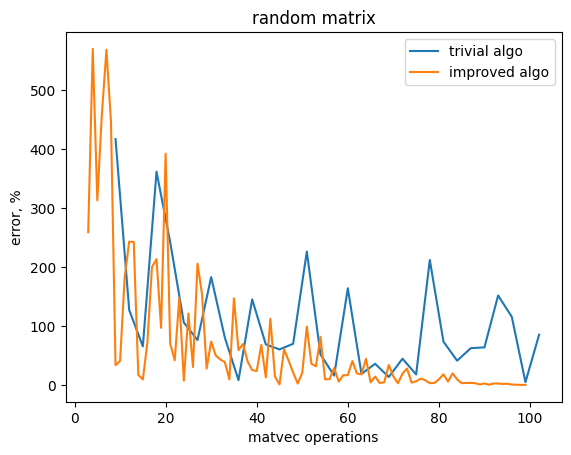

In [108]:
plt.plot(n[:len(n)//3],res_usual[:len(n)//3], label = 'trivial algo')
plt.plot(n/3, res_imp, label = 'improved algo')
plt.title('random matrix')
plt.legend()
plt.xlabel('matvec operations')
plt.ylabel('error, %')

Text(0, 0.5, 'error, %')

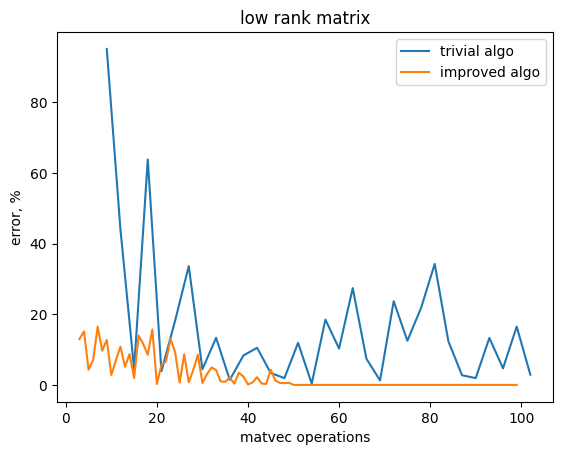

In [109]:
res_imp = list()
res_usual = list()

for N in n:
    res_usual.append(np.abs((hutch_rad(C_r,N)-c_tr)/c_tr*100))
    res_imp.append(np.abs((hutch_impr(C_r,N, distribution = 'rad')-c_tr)/c_tr*100))
    
plt.plot(n[:len(n)//3],res_usual[:len(n)//3], label = 'trivial algo')
plt.plot(n/3, res_imp, label = 'improved algo')
plt.title('low rank matrix')
plt.legend()
plt.xlabel('matvec operations')
plt.ylabel('error, %')

2. For random spd matrices with eigenvalues $\lambda_i = i^{-\alpha}$ for several $\alpha$, i.e., for matrices with fast- and slow-decaying spectrum.

Text(0, 0.5, 'error, %')

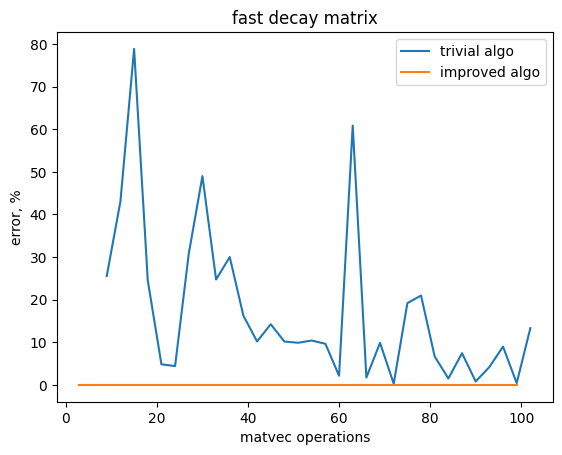

In [110]:
def spd_special(n, alpha):
    eigval = list()

    for i in range(1, n+1):
        eigval.append(i ** -alpha)

    randm = np.random.randn(n, n)
    Q, _ = np.linalg.qr(randm)

    result = np.zeros([n, n])
    for r in range(n):
        b = np.expand_dims(Q[:, r], axis=1)
        result += np.dot(b,b.T) * eigval[r]
    return result

A = spd_special(100, 10**2)

a_tr = np.trace(A)
res_imp = list()
res_usual = list()

for N in n:
    res_usual.append(np.abs((hutch_rad(A,N)-a_tr)/a_tr*100))
    res_imp.append(np.abs((hutch_impr(A,N, distribution = 'rad')-a_tr)/a_tr*100))
    
plt.plot(n[:len(n)//3],res_usual[:len(n)//3], label = 'trivial algo')
plt.plot(n/3, res_imp, label = 'improved algo')
plt.title('fast decay matrix')
plt.legend()
plt.xlabel('matvec operations')
plt.ylabel('error, %')

Text(0, 0.5, 'error, %')

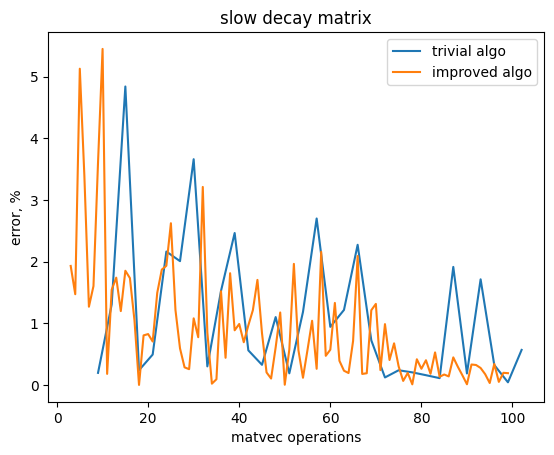

In [111]:
A = spd_special(100, 0.5)

a_tr = np.trace(A)
res_imp = list()
res_usual = list()

for N in n:
    res_usual.append(np.abs((hutch_rad(A,N)-a_tr)/a_tr*100))
    res_imp.append(np.abs((hutch_impr(A,N, distribution = 'rad')-a_tr)/a_tr*100))
    
plt.plot(n[:len(n)//3],res_usual[:len(n)//3], label = 'trivial algo')
plt.plot(n/3, res_imp, label = 'improved algo')
plt.title('slow decay matrix')
plt.legend()
plt.xlabel('matvec operations')
plt.ylabel('error, %')

3. Summarize your observations.

In general, improved algorithm converges faster then trivial. It should be noticed, that for special type of matrices (with fast decay spectrum) improved algorithm returns exact answer for any number of matvec operations

# Problem 3 (Universal adversarial attacks) (18 pts) 

## Intro

Suppose we have some classification model $f: X \to Y$ which takes vector $x \in \mathbb{R^n}$ and output some label $y$. It appears that deep neural networks are valunable to small imperceptible perturbations called adversarial attacks. Formally, an adversarial attack is the verctor $\varepsilon \in \mathbb{R^n}$ that leads to misclassification: $y(x) \neq y(x + \varepsilon)$.

<img src="https://openai.com/content/images/2017/02/adversarial_img_1.png" style="display=block; margin:auto">

However, it was shown that there exist universal adversarial perturbations: $\varepsilon \in \mathbb{R^n}$ that leads to misclassification $y(x) \neq y(x + \varepsilon)$ for most of inputs.

The hypetesis is that perturbation of a hidden layer caused by an attack will propagate further in the network changing predicted label of x.

Let $f_i$ be the output of $i$-s hidden layer, then
$$f_i(x + \varepsilon) - f(x) \approx J_i(x)\varepsilon$$
So, to find attack we need to solve the folliwing optimization problem
$$
\max_{\|\varepsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q
$$

## Problem discription

+ Obtain fixed point iteration to solve the problem above using first order optimality condition. **(5 pts)**
+ Suppose additionally that $\varepsilon$ should be sparse: $\|\varepsilon\|_0 \leq k$. Correct the algorithm above using additional truncation operator. **(5 pts)**
+ Implement algorithms 1 and 2. Find universal perturbations on CIFAR dataset using random batch of size 64. Report fooling rate depending on hyperparameters **(8 pts)**
$$
\text{FoolingRate} = \frac{1}{N}\sum\limits_{i = 1}^N \mathbb{1}[y(x + \varepsilon) \neq y(x)]
$$



Fistly, let's notice that problem above: 

$$
\max_{\|\varepsilon\|_q = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_p^p
$$

is equivalent of 

$$
\max_{\|\varepsilon\|_q = 1} \|J_i\varepsilon\|_p 
$$

where $J_i$ is the matrix obtained via stacking $J_i(x_j)$ vertically for each $x_j \in X$

let's denote $J_i = J$ and consider $f(\epsilon)$:

$$
f(\epsilon) = \frac{\|J\varepsilon\|_p}{\|\epsilon\|_q} = \frac{(\sum_i|J_{i}\epsilon|^p)^\frac{1}{p}}{(\sum_i|\epsilon_i^q|)^\frac{1}{q}}
$$

Consider $\nabla f = 0$:

$$
\frac{\partial f}{\partial \epsilon_i} = \frac{\|\epsilon\|_q\|J\epsilon\|_p^{1-p}\cdot\sum_j j_{ij}|J_j\epsilon|^{p-1} - \|\epsilon\|_q^{1-q}\|J\epsilon\|_p\cdot|\epsilon_i|^{q-1}}{\|\epsilon\|_q^2}
$$

At a critical point, $\frac{\partial f}{\partial \epsilon_i} = 0$ for all $i$. Thus for all i,

$$
|\epsilon_i|^{q-1} = \frac{\|\epsilon^q_q\|}{\|J\epsilon\|^p_p}\cdot\sum_jj_{ij}|J_j\epsilon|^{p-1}
$$

Define an operator $S$ with the $i$th coordinate of $S\epsilon$ being:

$$
(S\epsilon)_i = (\sum_jj_{ij}(J_j\epsilon)^{p-1})^\frac{1}{q-1}
$$

Thus, at a critial point, $S\epsilon \propto \epsilon$

Also define function:

$$
\psi_r(x) = \text{sign}x|x|^{r-1}, r \geq 1
$$

which applies to vectors element-wise

Also define $r^*$ such that $\frac{1}{r}+\frac{1}{r^*}=1$
Consider the following algorithm (power method):

**Input.** A matrix $J$, random vector $\epsilon$.
1. Initialize $\epsilon = \frac{\epsilon}{\|\epsilon\|_p}$
2. **while** not converged **do**
3. $S\epsilon \leftarrow \psi_{p^*}(J^T\psi_q(J\epsilon)) $
4.      $\epsilon \leftarrow \frac{S\epsilon}{\|S\epsilon\|_p}$
5. end **do**
6. **return** $\epsilon$

However in our case matirx $J$ is too big, so let's consider one more algorithm to construct the matvec functions of the Jacobian of a hidden layer of DNN:

**Input.** $v_1 \in \mathbb{R}^n$, $v_2 \in \mathbb{R}^m$ - vectors to compute the matvec  functions of $f_i(x)$ - fixed hidden layer of the DNN .
1. $J_i^T(x)v_2 \leftarrow \text{grad}_v[<v,f_i(x)>](v_2)$
2. $S\epsilon \leftarrow \psi_{p^*}(J^T\psi_q(J\epsilon)) $
3. $g(v_2) \leftarrow <J_i^T(x)v_2,v_1>$
4. $J_i(x)v_1 \leftarrow \text{grad}_{v2}[g](0_m)$
5. **return** $J_i(x)v_1, J^T_i(x)v_2$

To sum up the idea, firstly we construct matvec functions of $J_i(x_j)$ and $J_i^T(x_j)$ then we construct matvec functions of $J_i(X)$ and $J_i^T(X)$ and then we run power method with the following **input**: $J_i(X)$, $J_i^T(X)$, random vector $\epsilon$

if $\epsilon$ is sparce, i.e. $\|\epsilon\|_0 \leq k$ we define a truncation operator $T_s(x)$: keep the top $s$ entries of $x$ in absolute values and set others to be 0. Then the power method above becomes:

**Input.** $J_i(X)$, $J_i^T(X)$, random vector $\epsilon$, truncation operator $T_s(x)$
1. Initialize $\epsilon = \frac{\epsilon}{\|\epsilon\|_p}$
2. **while** not converged **do**
3. $S\epsilon \leftarrow \psi_{p^*}(J^T\psi_q(J\epsilon)) $
4. $\epsilon \leftarrow \frac{S\epsilon}{\|S\epsilon\|_p}$
5. $\epsilon \leftarrow T_s(\epsilon)$
6. end **do**
7. **return** $\epsilon$

In [47]:
import torch
import torch.nn as nn
import requests
from torch import autograd
from torchvision.models.feature_extraction import create_feature_extractor
from torchvision.models.feature_extraction import get_graph_node_names
import pickle

In [48]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None


def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [49]:
class CifarNet(nn.Module):
    def __init__(self):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3)

        self.pool = nn.MaxPool2d(2, 2)

        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(3200, 256)
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(-1, 3200)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [50]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

file_id = "1qrNvr3eLYjvbkVg5jY2sYA2rqK9XkTXs"
download_file_from_google_drive(file_id, "./cifar_checkpoint.pth")

model = CifarNet().to(device)
model.load_state_dict(torch.load("./cifar_checkpoint.pth", map_location="cpu"))

<All keys matched successfully>

In [51]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

dataset = unpickle(r'C:\Users\ivang\Desktop\cifar-10-batches-py\data_batch_1')
meta_data = unpickle(r'C:\Users\ivang\Desktop\cifar-10-batches-py\batches.meta')

In [52]:
batch = dataset[b'data'][:64]
batch = batch.reshape(64, 3, 32, 32)
batch_img = torch.tensor(batch.astype('float32'))

In [53]:
def get_hidden_out(model, batch, index):
    names = get_graph_node_names(model)[0][2:]
    nodes = {names[index]:str(index)}
    model = create_feature_extractor(model, return_nodes=nodes)
    out = model(batch)[str(index)]
    return out

In [54]:
input_shape = batch_img.shape[1:]
output_shape = get_hidden_out(model, batch_img, 3).shape[1:]
input_dim = torch.prod(torch.tensor(input_shape)).item()
hidden_dim = torch.prod(torch.tensor(output_shape)).item()

In [55]:
def matvec(vec):
    result = []
    for img in batch_img:
        result.append(_matvec_grad(img.unsqueeze(0), vec).detach())
    return torch.cat(result)

def matvec_T(vec):
    result = torch.zeros(input_dim)
    vec_flat = vec.reshape(-1, hidden_dim)
    for img, vec in zip(batch_img, vec_flat):
        result += _matvec_T_grad(img.unsqueeze(0), vec).detach().flatten()
    return result

def _matvec_grad(img, vec):
    w = torch.zeros(hidden_dim, requires_grad=True)
    matvec_transposed = _matvec_T_grad(img, w) 
    dotproduct = torch.matmul(matvec_transposed.flatten(), vec.flatten())
    return torch.autograd.grad(dotproduct, w)[0]

def _matvec_T_grad(img, vec):
    img.requires_grad = True
    layer_output = get_hidden_out(model, img, 3)
    dotproduct = torch.matmul(layer_output.flatten(), vec.flatten())
    return torch.autograd.grad(dotproduct, img, create_graph=True)[0]


In [171]:
def psi(x, p):
    return torch.sign(x) * torch.abs(x) ** (p - 1)

In [179]:
def findvec(batch_img, p=250, q=1, N_iterations = 30, k =int(2*len(v)/3), sparce = False):
    
    v = torch.zeros(input_dim)
    nn.init.normal_(v, std=0.2)
    v = v / torch.norm(v, p=p)
    p2 = 1.0 / (1.0 - 1.0 / p) 

    for i in range(N_iterations):
        Jv = matvec(v)
        v = psi(matvec_T(_psi(Jv, q)), p2)
        v = v / torch.norm(v, p=p)
        if sparce == True:
            v[k:len(v)] = 0
    vector = v.detach()
    return vector

In [178]:
vec = findvec(batch_img)

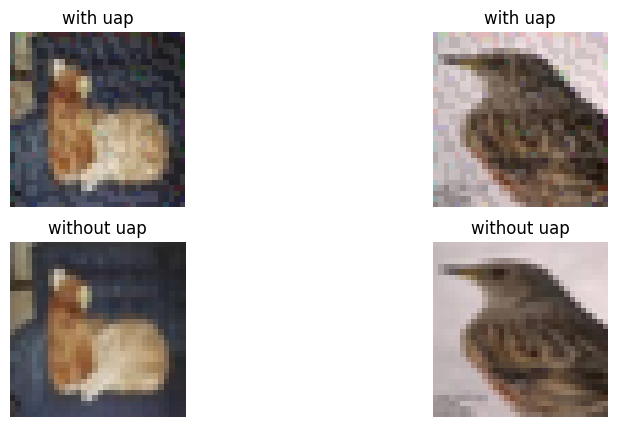

In [180]:
ves = vec.reshape(3,32,32)
ves = ves.numpy()
ves = ves.transpose(1,2,0)
fig, ax = plt.subplots(2,2,figsize=(10, 5))
for i in range(2):
    img = dataset[b'data'][i+17]
    img = img.reshape(3, 32, 32)
    img = img.transpose(1,2,0)
    ax[0,i].imshow((ves*255).astype(np.uint8)+img)
    ax[0,i].axis('off')
    ax[0,i].set_title("with uap")
    ax[1,i].imshow(img)
    ax[1,i].axis('off')
    ax[1,i].set_title("without uap")
    

In [90]:
tr = np.argmax(np.array(model(batch_img).detach()), axis = 1)
tr_uap = np.argmax(np.array(model(batch_img+vec.reshape(3,32,32)).detach()), axis = 1)

result = 0
a = list(zip(tr,tr_uap))


for i in a:
    if i[0]!= i[1]:
        result+=1
        
print('for p = 250, q = 1 Fooling rate is:',result/64)

for p = 250, q = 1 Fooling rate is: 0.265625


# Problem 4 (Image restoration) (23 pts) 

Image restoration is the task where we need to eliminate blurring and some random noise to get ideal image. Practically, images obtained in real life could be represented in following way:

$$g = f * h + n$$

where $g$ - obtained image of size $(N,N)$, $h$ - blur kernel of size $(3,3)$, $n$ - an additive zero-mean Gaussian white noise, and $f$ - ideal image (deblurred and denoised). In our work we will use gaussian blur kernel with window size 3:

$$h = \frac{1}{16}\begin{pmatrix}1 & 2 & 1\\ 2 & 4 & 2\\ 1 & 2 & 1\end{pmatrix}$$

Here $f*h$ is a 2-d convolution of ideal image with blur kernel, which could be rewritten in matrix format:

$$f * h = H \mathrm{vec}(f)$$

where $H$ - block Toeplitz with Toeplitz blocks matrix which corresponds to 2-d convolution with kernel $h$, $\mathrm{vec}(\cdot)$ - operation of vectorization.

So, let us write the task of finding $f$ as optimization problem:

$$\min\limits_{f,u} \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}}$$
where $\|u\|_{\mathrm{TV}} = \sum\limits_{1\leq j,k\leq N}\|\nabla u_{j,k}\|_2 = \sum\limits_{1\leq j,k\leq N}\sqrt{(u_{j+1,k}-u_{j,k})^2 + (u_{j,k+1}-u_{j,k})^2}$ here we calculate gradients (pixel differences) along **x** and **y** image dimensions.

One can notice that problem could be splitted on two:

$$\min\limits_{u}\min\limits_f \{\|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2\} + \alpha_2\|u\|_{\mathrm{TV}}$$

To find the solution we will use iterative method:

$$\begin{cases}
f^{(i)} = \arg\min\limits_f \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u^{(i-1)})\|_2^2 & (a)\\
u^{(i)} = \arg\min\limits_u \alpha_1\|\mathrm{vec}(f^{(i)}-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}} & (b)
\end{cases}$$

Taking matrix derivative over the minimization functional in subproblem **(a)** we get the system:

$$(H^TH + \alpha_1I)\mathrm{vec}(f) = H^T\mathrm{vec}(g+\alpha_1u^{(i-1)})$$

This system can be solved by conjugate gradient method. Also, taking into account that $H$ is block Toeplitz with Toeplitz blocks (BTTB), we can make fast matrix by vector multiplication.

The subproblem **(b)** could be solved by using any kind of solver of your choice.

**So, your task is to:**

1. Implement creation and fast matrix by vector multiplication for matrix $H$ **(6 pts)**
2. Implement solver for subproblem **(a)** based on conjugate gradient descent using fast matrix by vector multiplication for $H$. **(8 pts)**
3. Implement some solver for subproblem **(b)** **(3 pts)**
4. Implement iterative solver for the total problem using solvers for subproblems **(a)** and **(b)** **(3 pts)**
5. Blur (use defined blurring kernel) given image and add gaussian noise with zero mean and some variance (up to you). Try to restore the image, compare the result with the original one. Make a conclusion. **(3 pts)**


In [11]:
from PIL import Image, ImageOps
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

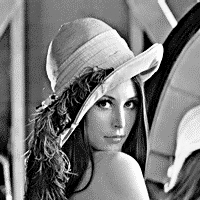

In [2]:
orig_image = ImageOps.grayscale(Image.open(r"C:\Users\ivang\Desktop\lena.png"))
orig_image

In [3]:
X = np.array(orig_image)
K = np.array([[1,2,1],[2,4,2],[1,2,1]])/16

In [4]:
def mult(X, K):
    m,n = X.shape
    k,l = K.shape

    H = np.zeros((2*m-1, 2*n-1))
    H[:k, :l] = K
    H = np.roll(H,(-(k//2),-(l//2)), axis=(0, 1))
    X = np.pad(X,((0,m-1),(0,n-1)))

    g = np.fft.ifft2(np.fft.fft2(H) * np.fft.fft2(X))
    return np.real(g[:m, :n])


In [5]:
def solver1(g, h, u, f0, alpha, N_iter):
    
    def mult_transposed(X, K):
        return mult(X, K.T)
    
    def A_mult(f):
        return mult_transposed(mult(f, h), h) + alpha*f

    
    b = mult_transposed(g, h)+alpha*u

    fk = f0
    pk = rk = b - A_mult(f0)
    rk_norm = np.linalg.norm(rk)

    for _ in range(N_iter):
        A_pk = A_mult(pk)
        rkT_rk = np.dot(rk.flatten(), rk.flatten())

        Beta = rkT_rk / np.dot(pk.flatten(), A_pk.flatten())
        fk = fk + Beta * pk
        rk = rk - Beta * A_pk
        gamma = np.dot(rk.flatten(), rk.flatten()) / rkT_rk
        pk = rk + gamma * pk

    return fk

def solver2(f, alpha):
    from skimage.restoration import denoise_tv_chambolle
    if alpha == 0:
        return f
    return denoise_tv_chambolle(f, weight=alpha)

def restoration(g, h, f0, u0, alpha_i=1, alpha_j=2, N_iter=15, M_iter=10):
    fk = f0
    uk = u0
    for _ in range(N_iter):
        fk = solver1(g, h, uk, fk, alpha_i, M_iter)
        uk = solver2(fk, alpha_j)

    return uk

In [8]:
g = mult(X, K) + np.random.normal(scale=2, size=X.shape)

In [9]:
restored = restoration(X, K, f0=np.zeros_like(X),u0=np.zeros_like(X))

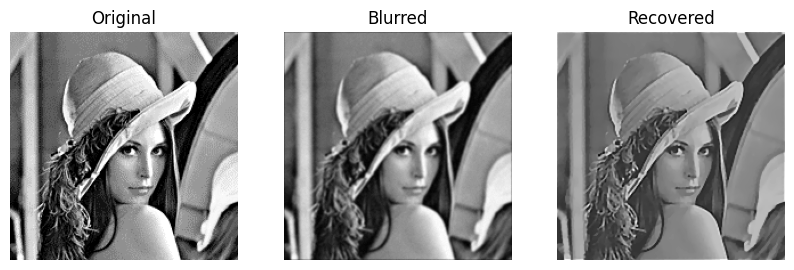

In [13]:
fig, axes = plt.subplots(1,3, figsize=(10, 5))
titles = ['Original','Blurred','Recovered']
images = [X, g, restored]
for i in range(3):
    axes[i].imshow(images[i], cmap = 'gray')
    axes[i].axis('off')
    axes[i].set_title(titles[i])